In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

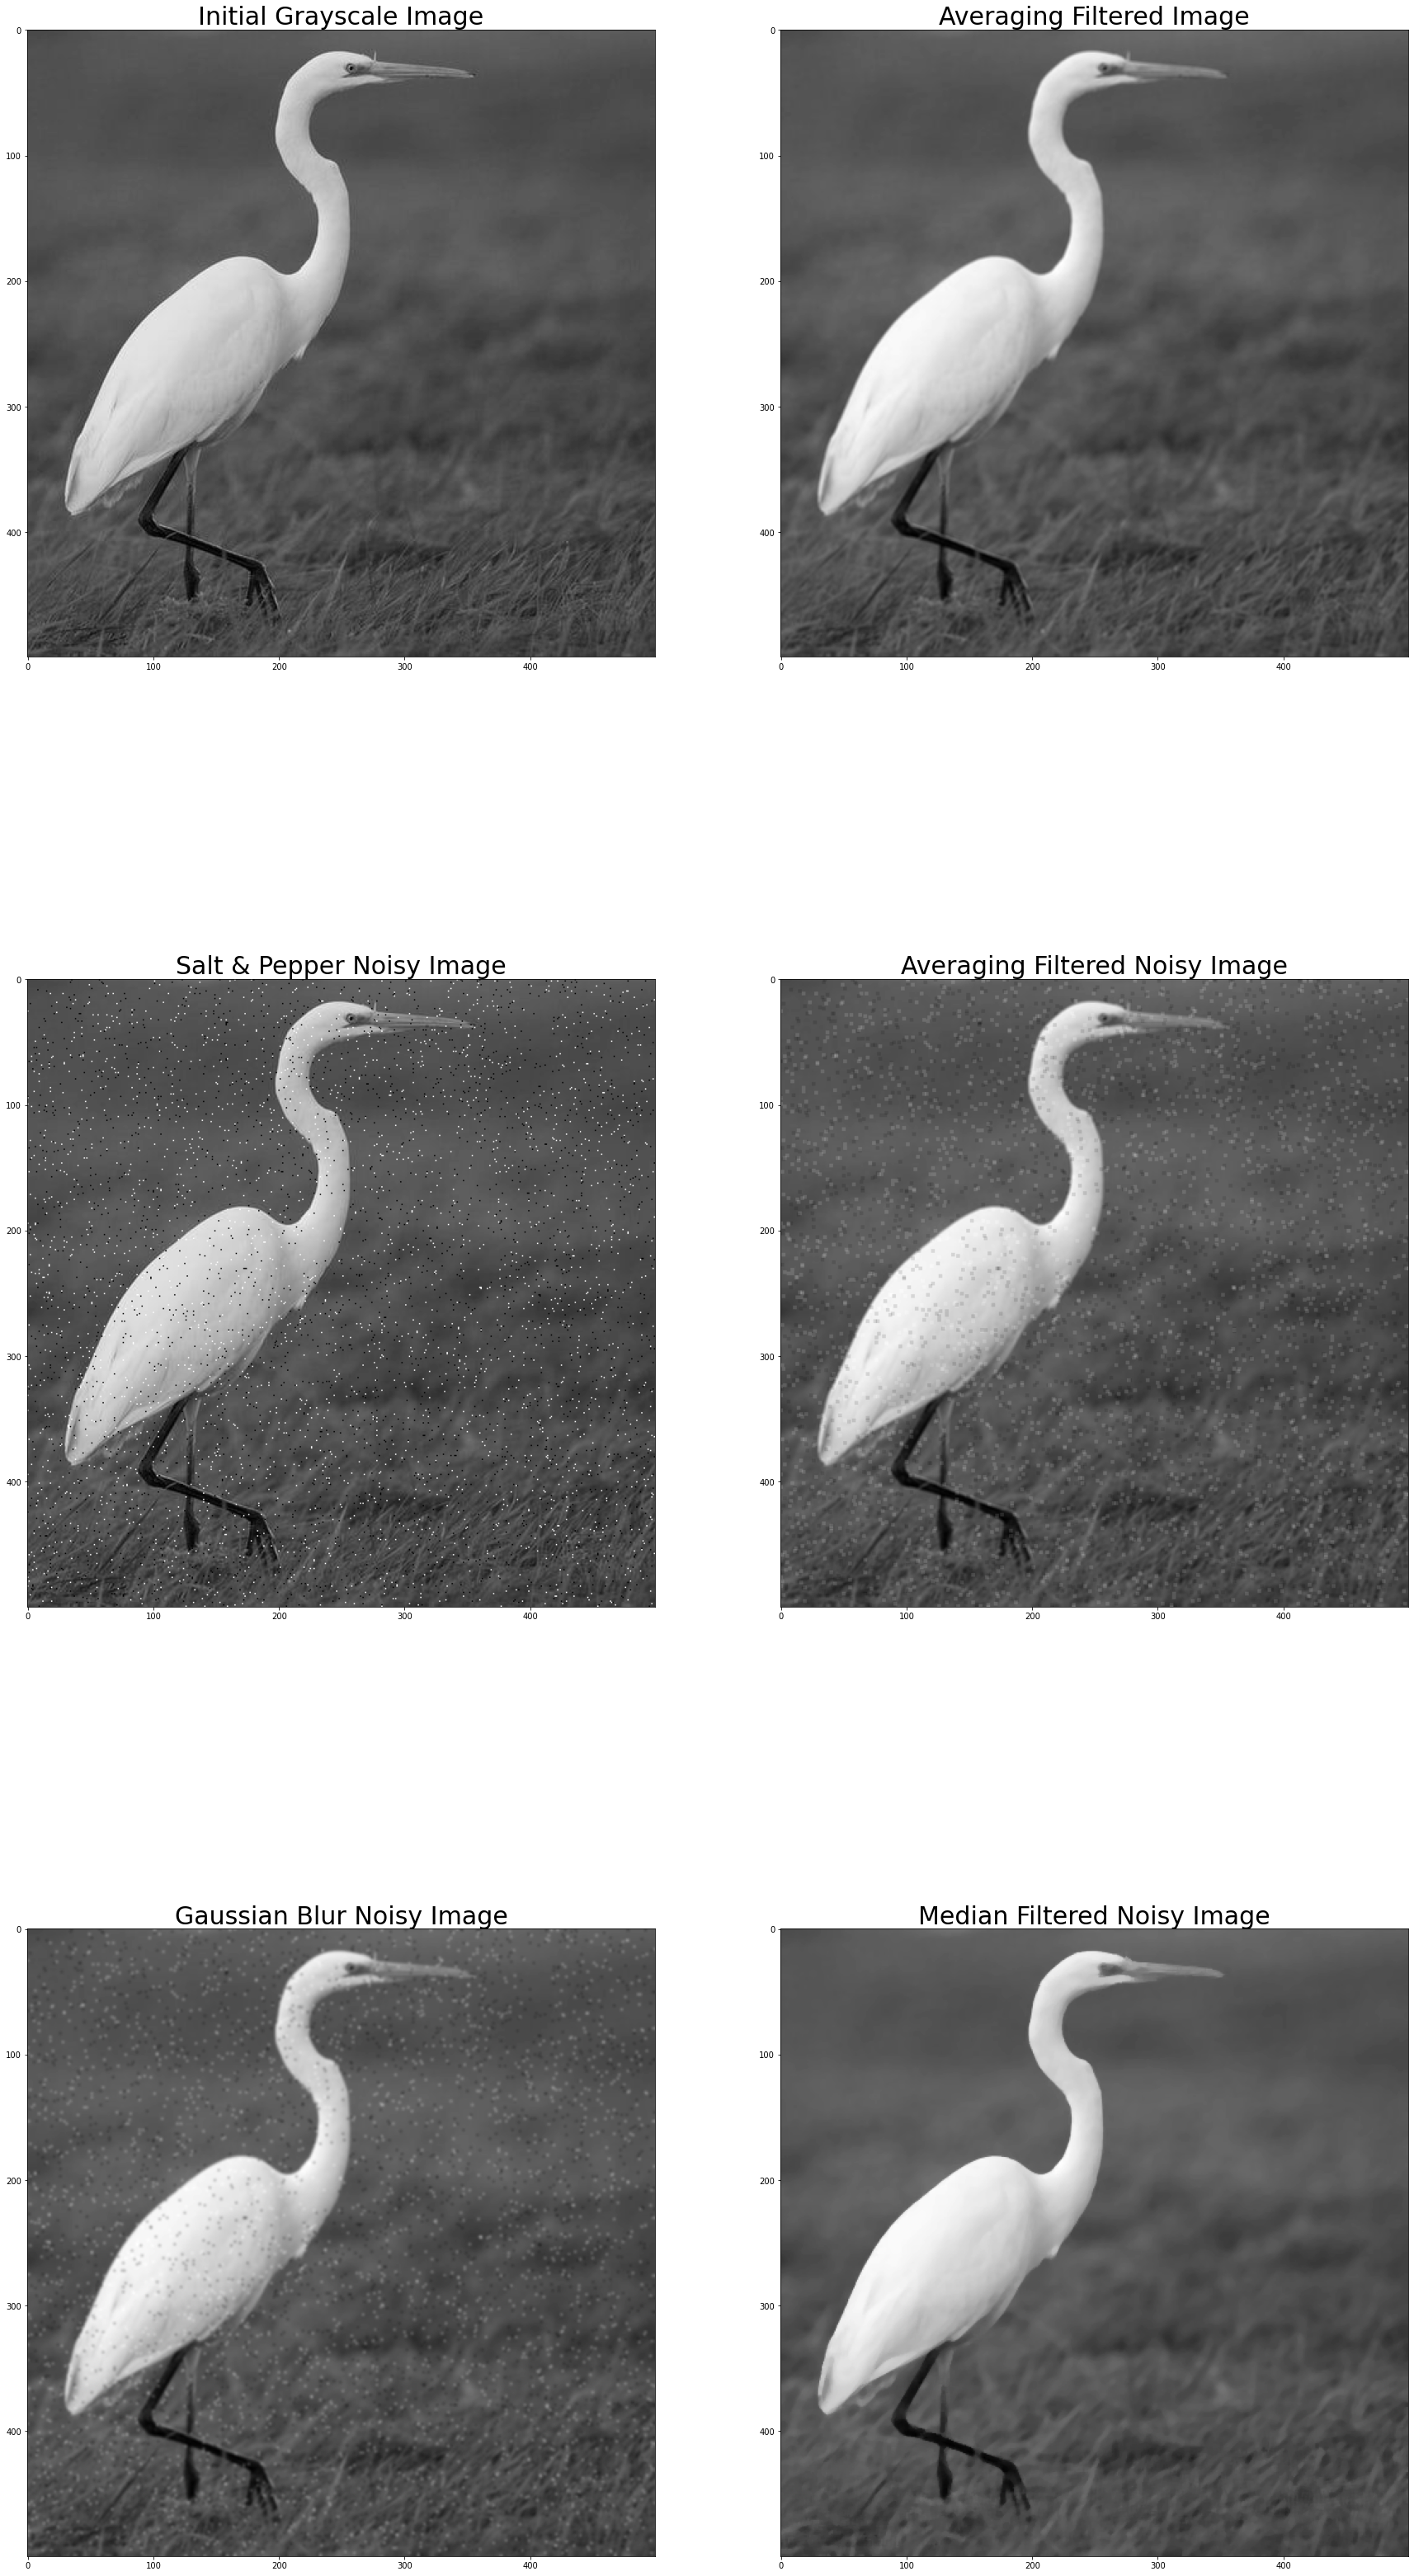

In [32]:
img = []
title = ['Initial Grayscale Image', 'Averaging Filtered Image',
         'Salt & Pepper Noisy Image', 'Averaging Filtered Noisy Image',
         'Gaussian Blur Noisy Image', 'Median Filtered Noisy Image']
x = 3
y = 2

plt.figure(figsize = (30, 60))

imgPath = './image.jpg'
image = plt.imread(imgPath)

grayImg = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
img.append(grayImg)

avgKernel = np.array([[1/9, 1/9, 1/9],[1/9, 1/9, 1/9],[1/9, 1/9, 1/9]])
avgFiltering = cv2.filter2D(grayImg, -1, avgKernel)
img.append(avgFiltering)

noiseAmount = 5000
xNoise = np.random.randint(grayImg.shape[0], size=noiseAmount)
yNoise = np.random.randint(grayImg.shape[1], size=noiseAmount)
noisyImg = np.copy(grayImg)
for i in range(noiseAmount):
    noisePixel = np.random.randint(2)
    noisyImg[xNoise[i],yNoise[i]] = noisePixel*255

img.append(noisyImg)

avgFiltering = cv2.filter2D(noisyImg, -1, avgKernel)
img.append(avgFiltering)

gaussBlurImg = cv2.GaussianBlur(noisyImg,(5,5),0)
img.append(gaussBlurImg)

medianImg = cv2.medianBlur(noisyImg,5)
img.append(medianImg)

for i in range(len(img)):
    plt.subplot(x, y, i+1)
    plt.title(title[i], fontsize=30)
    plt.imshow(img[i], cmap='gray')

plt.savefig('Processed-Image.jpg')
